In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('training_data.csv')

In [3]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


## statistical distribution of the training data

In [4]:
 data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [5]:
print('There are' , len(data['Facies'].unique()), ' individual Facies')
print( len(data['Formation'].unique()), ' Formations')
print( 'and', len(data['Well Name'].unique()), ' Wells')

There are 9  individual Facies
14  Formations
and 8  Wells


### Features include:
1) Gamma ray (GR)
2) Resistivity (ILD_log10)
3) Photoelectric effect (PE)
4) Neutron-density porosity difference (DeltaPHI)
5) Average neutron-density porosity (PHIND)
6) Nonmarine/marine indicator (NM_M)
7) Relative position (RELPOS)

### Checking for NaN Values

In [6]:
data['GR'].isnull().sum()

0

In [7]:
for well_name, df in data.items():
    print(f"\nMissing values in {well_name}:")
    missing_values = df.isnull().sum()
    print(missing_values)

    # Handle missing values by forward filling
    #df.ffill(inplace=True)  # Using the recommended forward fill method
    #well_data[well_name] = df


Missing values in Facies:
0

Missing values in Formation:
0

Missing values in Well Name:
0

Missing values in Depth:
0

Missing values in GR:
0

Missing values in ILD_log10:
0

Missing values in DeltaPHI:
0

Missing values in PHIND:
0

Missing values in PE:
0

Missing values in NM_M:
0

Missing values in RELPOS:
0


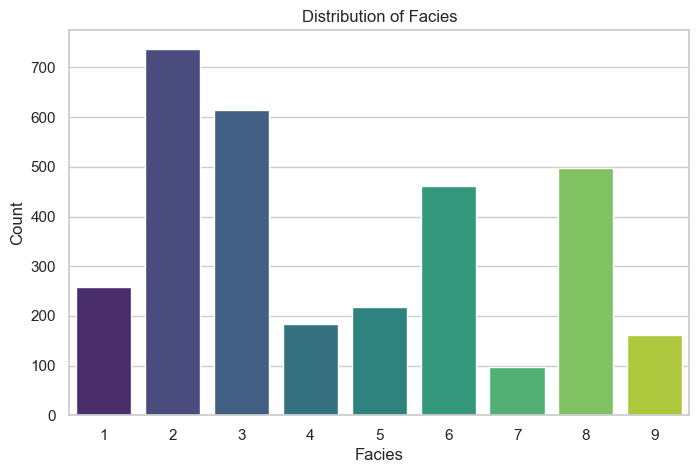

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Plot the distribution of the target variable (Facies)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Facies", palette="viridis")
plt.title("Distribution of Facies")
plt.xlabel("Facies")
plt.ylabel("Count")
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_26240\342219519.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


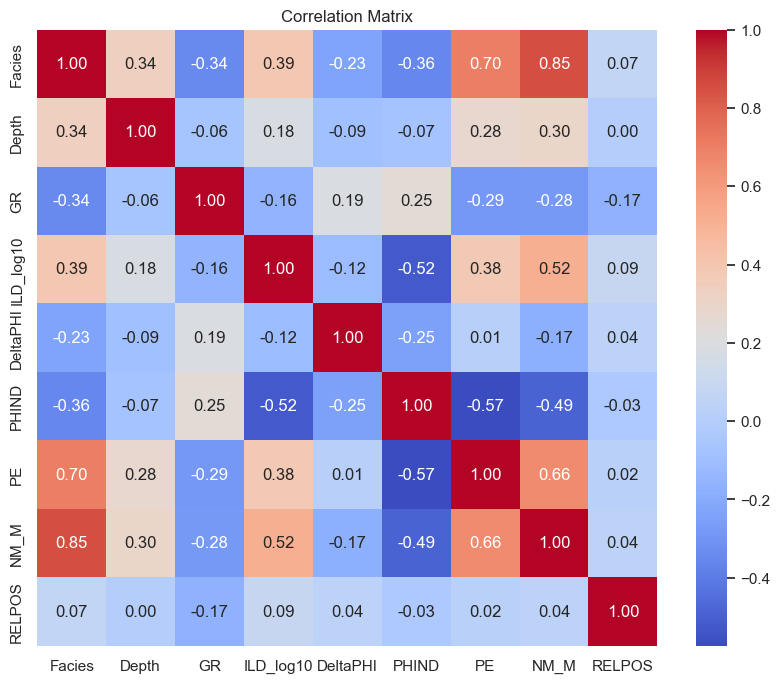

In [9]:
# 3. Visualize correlations between numerical features
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()



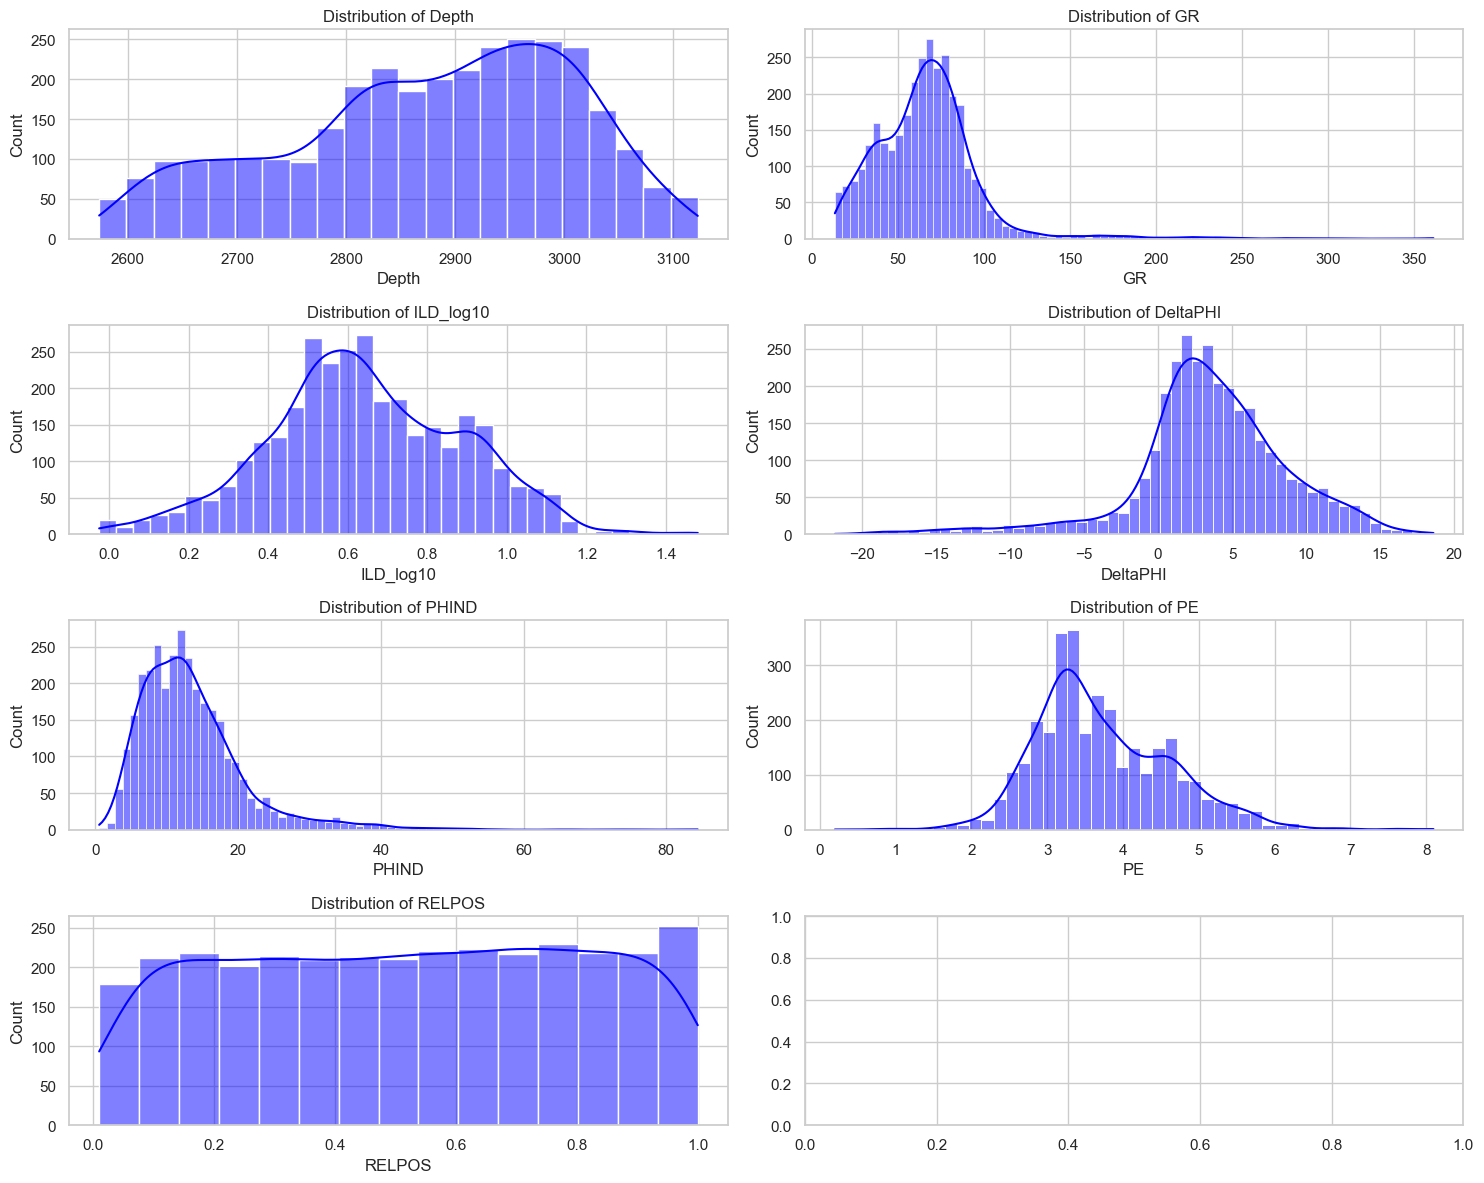

In [10]:
# 4. Plot distributions of continuous variables
numerical_features = ["Depth", "GR", "ILD_log10", "DeltaPHI", "PHIND", "PE", "RELPOS"]
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()



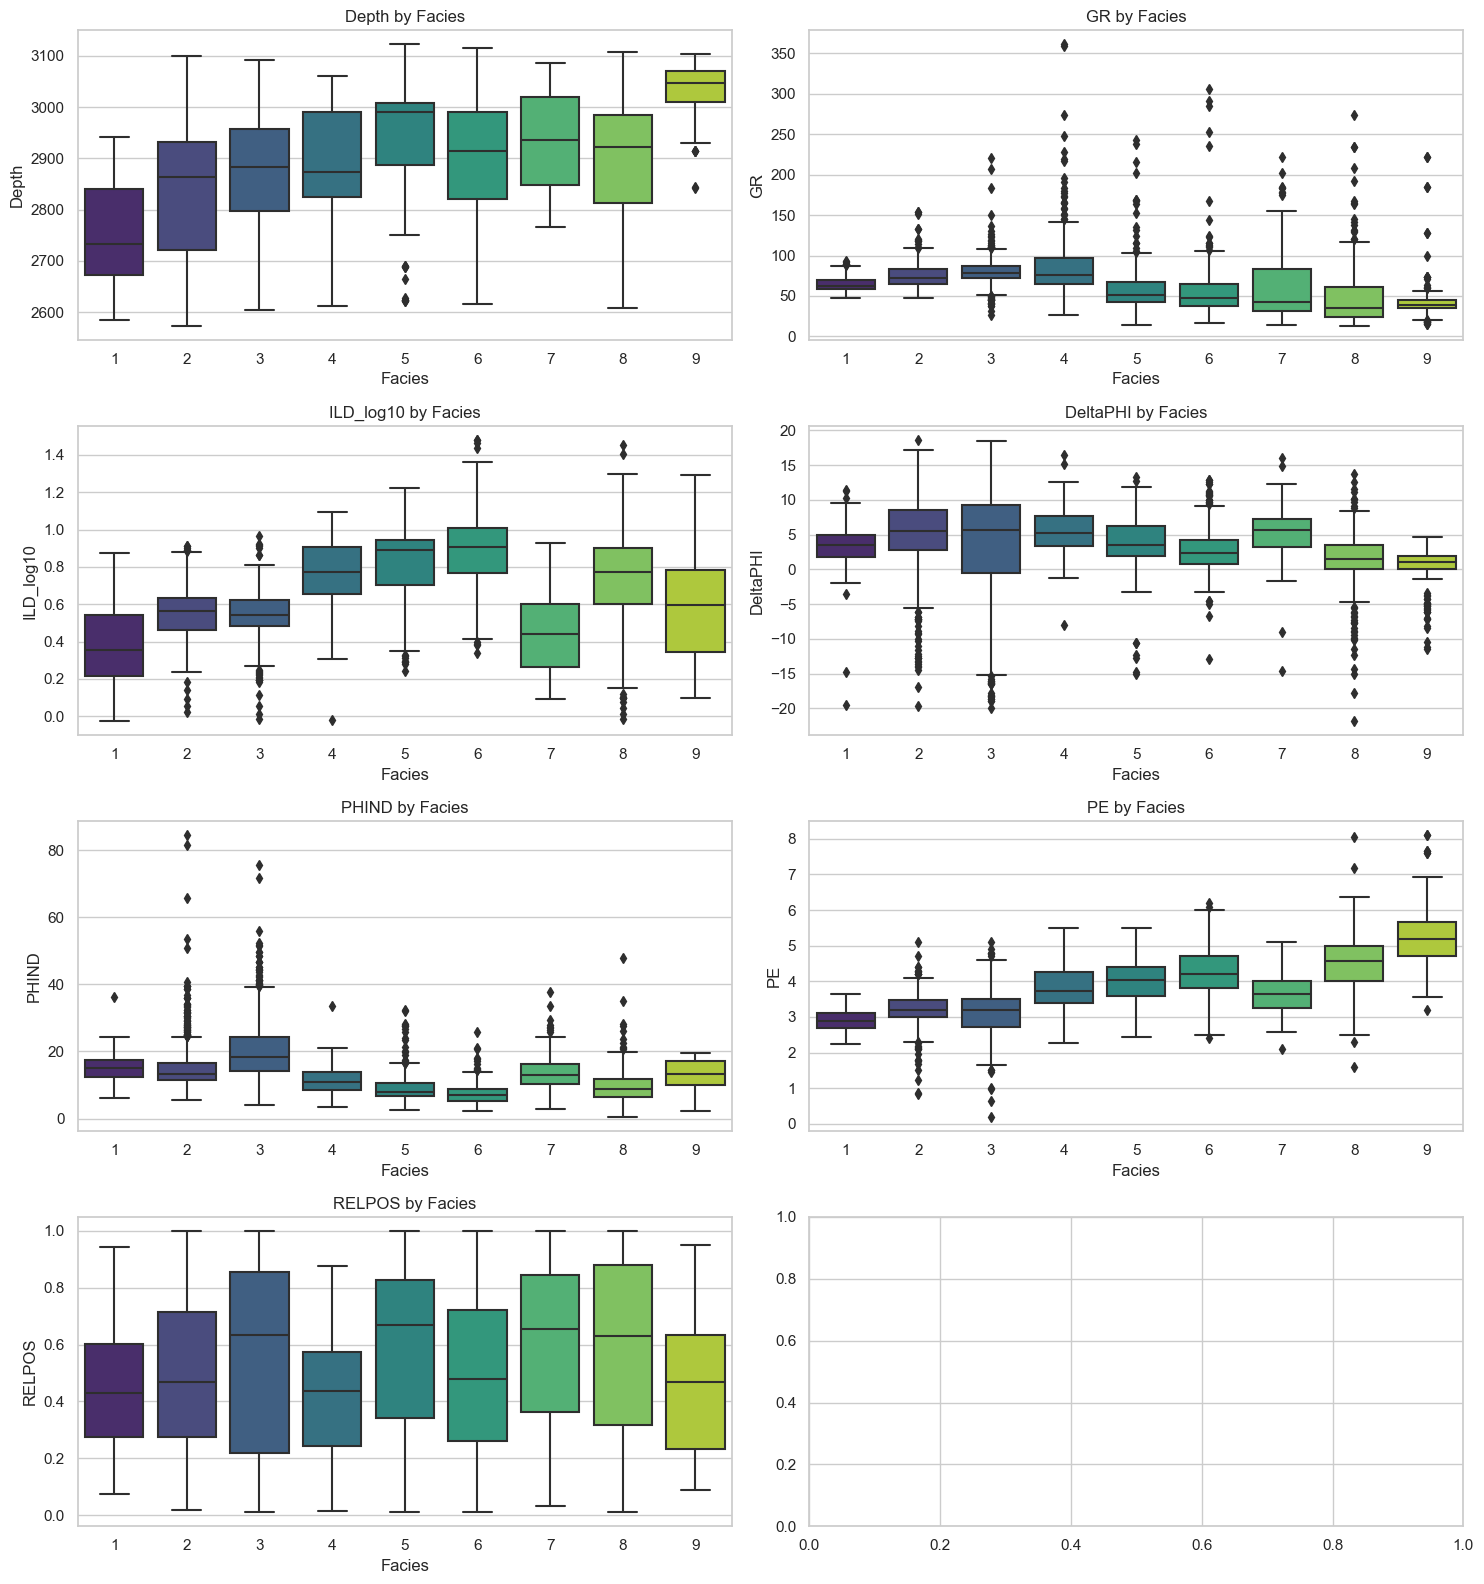

In [11]:
# 5. Boxplots to analyze feature distribution by Facies
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data, x="Facies", y=feature, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{feature} by Facies")
plt.tight_layout()
plt.show()



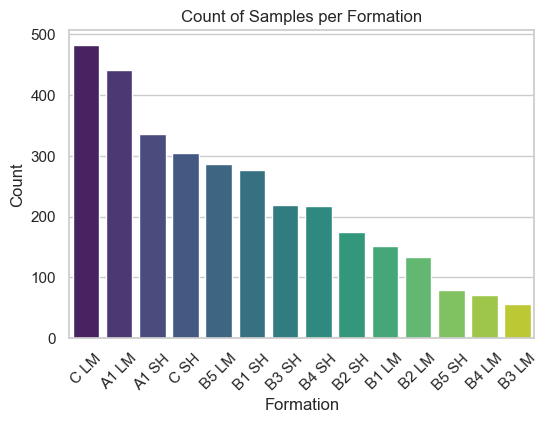

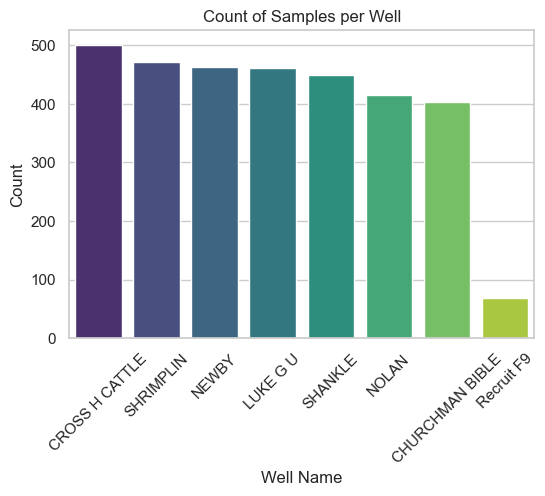

In [12]:
# 6. Analyze categorical variables (Formation and Well Name)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Formation", order=data["Formation"].value_counts().index, palette="viridis")
plt.title("Count of Samples per Formation")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Well Name", order=data["Well Name"].value_counts().index, palette="viridis")
plt.title("Count of Samples per Well")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()



In [13]:
# Output missing values summary
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64


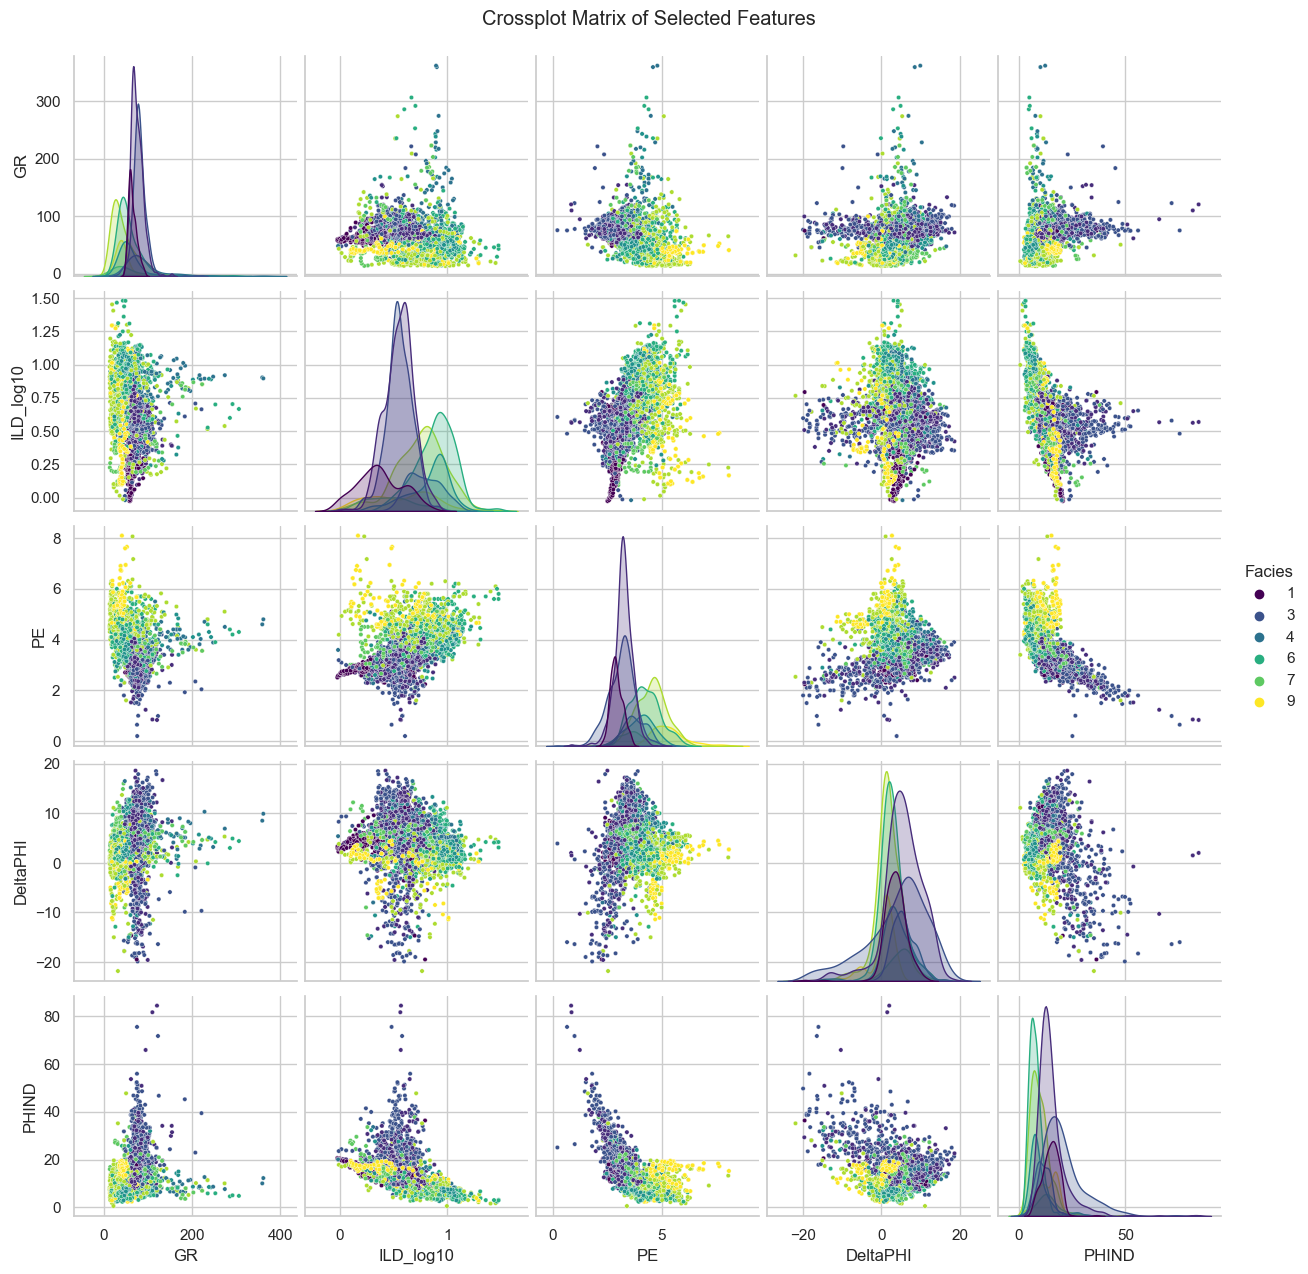

In [14]:
# 7. Crossplot matrix excluding Depth
grid_features = ["GR", "ILD_log10", "PE", "DeltaPHI", "PHIND"]
g = sns.pairplot(data, vars=grid_features, hue="Facies", palette="viridis", diag_kind="kde", plot_kws={"s": 10})
g.fig.suptitle("Crossplot Matrix of Selected Features", y=1.02)
plt.show()

# Log Visualization 

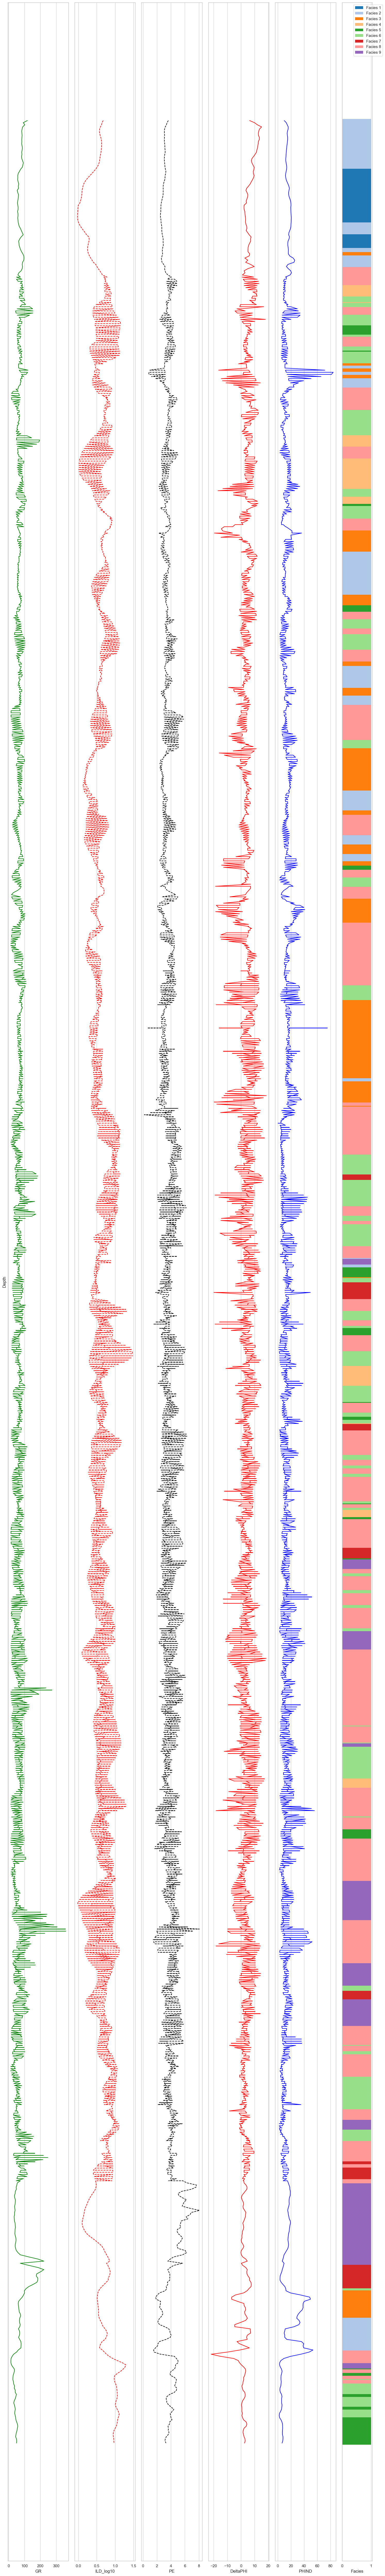

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ensure Depth is sorted in ascending order
data = data.sort_values(by="Depth")

# Define the logs to be plotted
logs = ["GR", "ILD_log10", "PE", "DeltaPHI", "PHIND"]  # Exclude "NM_M" and "RELPOS"
num_logs = len(logs)

# Define facies colors with more variation
facies_colors = sns.color_palette("tab20", n_colors=data["Facies"].nunique())
facies_color_map = dict(zip(sorted(data["Facies"].unique()), facies_colors))

# Define line styles and colors for each log
log_styles = {
    "GR": {"color": "green", "linestyle": "-"},
    "ILD_log10": {"color": "red", "linestyle": "--"},
    "PE": {"color": "black", "linestyle": "--"},
    "DeltaPHI": {"color": "red", "linestyle": "-"},
    "PHIND": {"color": "blue", "linestyle": "-"},
}

# Set up the figure and axes with increased vertical scale
fig, axes = plt.subplots(1, num_logs + 1, figsize=(15, 100), sharey=True, gridspec_kw={'width_ratios': [1] * num_logs + [0.5]})

# Plot each log
for i, log in enumerate(logs):
    axes[i].plot(data[log], data["Depth"], label=log, **log_styles[log])
    axes[i].invert_yaxis()  # Depth increases downward
    axes[i].set_xlabel(log)
    axes[i].grid(True)
    if i == 0:
        axes[i].set_ylabel("Depth")

# Add the categorical facies track
for facies, color in facies_color_map.items():
    mask = data["Facies"] == facies
    axes[-1].barh(
        data.loc[mask, "Depth"],
        1,
        left=0,
        color=color,
        edgecolor="none",
        label=f"Facies {facies}"
    )
axes[-1].set_xlabel("Facies")
axes[-1].set_yticks([])
axes[-1].legend(loc="upper right", bbox_to_anchor=(1.4, 1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
